In [ ]:
pip install torch torchvision transformers

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image


In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
image = Image.open("/content/21ef318c87413bdece76ba63fa153575 (1).jpg")
inputs = processor(image, return_tensors="pt")


In [ ]:
output = model.generate(**inputs)

description = processor.decode(output[0], skip_special_tokens=True)
print(description)


a woman wearing white pants and a white jacket


In [ ]:
image = Image.open("/content/e60271e78e6bd143fb7c1ef337b8b47d.jpg")
inputs = processor(image, return_tensors="pt")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [ ]:
folder_path ='/content/drive/My Drive/clothes/party'


for filename in os.listdir(folder_path):
  if filename.endswith('.jpg') or filename.endswith('.png'):

    img_path = os.path.join(folder_path, filename)
    print(img_path)
    image = Image.open(img_path)
    inputs = processor(image, return_tensors="pt")

    output = model.generate(**inputs)
    description = processor.decode(output[0], skip_special_tokens=True)
    df.loc[len(df)] = [img_path, description]



/content/drive/My Drive/clothes/party/gold suit.jpg
/content/drive/My Drive/clothes/party/dress3.jpg
/content/drive/My Drive/clothes/party/gold dress.jpg
/content/drive/My Drive/clothes/party/black suit with skirt.jpg
/content/drive/My Drive/clothes/party/dress2.jpg
/content/drive/My Drive/clothes/party/dress1.jpg
/content/drive/My Drive/clothes/party/blouse and skirt.jpg
/content/drive/My Drive/clothes/party/red suit.jpg
/content/drive/My Drive/clothes/party/white suit.jpg


In [ ]:
from peft import PeftModel
from transformers import AutoModelForCausalLM

In [1]:
import pandas

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
# Dataset preparation
sentences = ["i want short skirt",
            "i want short dress",
            "i don't like short dress",
              "i don't like short skirt",
              "i prefer short skirt",
            "i prefer short dress",
            "i hate short dress",
            "i hate short skirt",
            "i don't want short skirt",
            "i don't want short dress",]
labels = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0]

class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, model):
        self.sentences = sentences
        self.labels = labels
        self.model = model

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        embedding = self.model.encode([self.sentences[idx]])
        embedding = torch.tensor(embedding) # Make torch tensor
        label = torch.tensor(self.labels[idx])
        return embedding, label


# Model for classification based on embeddings
class Classifier(nn.Module):
    def __init__(self, embedding_dim):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(embedding_dim, 2)  # 2 classes (like/dislike)

    def forward(self, x):
        x = self.fc(x)
        return x

# Training settings
embedding_dim = model.get_sentence_embedding_dimension()
classifier_model = Classifier(embedding_dim)

dataset = SentimentDataset(sentences, labels, model)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
optimizer = optim.Adam(classifier_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss() # Loss function for classification

# Training loop
for epoch in range(50):
    total_loss = 0
    for embedding, label in dataloader:
        optimizer.zero_grad()
        outputs = classifier_model(embedding.squeeze())
        loss = loss_fn(outputs, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch:{epoch}, Loss: {total_loss/len(dataloader)}")

# Example testing, after training you can run this on your new sentences
test_sentence = "I like short dress"
test_emb = model.encode([test_sentence])
test_output = classifier_model(torch.tensor(test_emb).squeeze())
print(f"Output for test sentence {test_sentence}: {test_output}") # Output

Epoch:0, Loss: 0.6842630743980408
Epoch:1, Loss: 0.6768134474754334
Epoch:2, Loss: 0.671568775177002
Epoch:3, Loss: 0.663642942905426
Epoch:4, Loss: 0.6580386161804199
Epoch:5, Loss: 0.6526469588279724
Epoch:6, Loss: 0.6472208023071289
Epoch:7, Loss: 0.643130648136139
Epoch:8, Loss: 0.6390345335006714
Epoch:9, Loss: 0.6345332622528076
Epoch:10, Loss: 0.630502438545227
Epoch:11, Loss: 0.6281243801116944
Epoch:12, Loss: 0.6217925310134887
Epoch:13, Loss: 0.6189459681510925
Epoch:14, Loss: 0.6146158695220947
Epoch:15, Loss: 0.6115823328495026
Epoch:16, Loss: 0.6076425671577453
Epoch:17, Loss: 0.6030944108963012
Epoch:18, Loss: 0.6001613080501557
Epoch:19, Loss: 0.5958540081977844
Epoch:20, Loss: 0.5932832002639771
Epoch:21, Loss: 0.5887694478034973
Epoch:22, Loss: 0.5854290187358856
Epoch:23, Loss: 0.5817607164382934
Epoch:24, Loss: 0.5784855246543884
Epoch:25, Loss: 0.5747858047485351
Epoch:26, Loss: 0.5717149794101715
Epoch:27, Loss: 0.569683825969696
Epoch:28, Loss: 0.5670227408409119


In [ ]:
df_summer = pd.read_excel('/content/summer for women.xlsx')

In [ ]:
df_summer

,index,images,description
0,1,image1.jpg,This summer mini-length sundress with a floral...
1,2,image2.jpg,This pink mini dress with a belt at the waist ...
2,3,image3.jpg,This mini dress of complex cut resembles a jac...
3,4,image4.jpg,This white shirt dress is made of lightweight ...
4,5,image5.jpg,This milky mini dress is made of silk. Thanks ...
5,6,image6.jpg,This outfit consists of a white long oversized...
6,7,image7.jpg,This outfit includes a short white top with lo...
7,8,image8.jpg,This look consists of denim mini shorts and a ...
8,9,image9.jpg,This sporty summer look consists of a blue ove...
9,10,image10.jpg,"The outfit is a short, collared, olive green s..."


In [ ]:
# Получаем эмбеддинги для всех описаний
corpus_embeddings = model.encode(df_summer['description'].tolist(), convert_to_tensor=True)

In [ ]:
# Получаем эмбеддинги для всех описаний
corpus_embeddings = model.encode(df_summer['description'].tolist(), convert_to_tensor=True)

In [ ]:
query_description = "I need a summer outfit for going out with friends. I don't like short skirt. It could be something with a long skirt or some kind of costume."
query_embedding = model.encode(query_description, convert_to_tensor=True)

In [ ]:
cosine_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]

In [ ]:
cosine_scores

tensor([0.5881, 0.6976, 0.6532, 0.4920, 0.5020, 0.6027, 0.6490, 0.6439, 0.5873,
        0.5449, 0.5334, 0.4884, 0.4986, 0.5528, 0.5437, 0.4896, 0.4140, 0.4538,
        0.4652, 0.4787, 0.4691, 0.4417, 0.4414, 0.4995, 0.5073, 0.4956],
       device='cuda:0')

In [ ]:
index = 1
score = dict()

for i in range(len(cosine_scores)):
  score[index] = cosine_scores[i]
  index+=1



In [ ]:

score_sort = {k: v for k, v in sorted(score.items(), key=lambda item: [item[1]], reverse=True) }

In [ ]:
score_sort

{2: tensor(0.6976, device='cuda:0'),
 3: tensor(0.6532, device='cuda:0'),
 7: tensor(0.6490, device='cuda:0'),
 8: tensor(0.6439, device='cuda:0'),
 6: tensor(0.6027, device='cuda:0'),
 1: tensor(0.5881, device='cuda:0'),
 9: tensor(0.5873, device='cuda:0'),
 14: tensor(0.5528, device='cuda:0'),
 10: tensor(0.5449, device='cuda:0'),
 15: tensor(0.5437, device='cuda:0'),
 11: tensor(0.5334, device='cuda:0'),
 25: tensor(0.5073, device='cuda:0'),
 5: tensor(0.5020, device='cuda:0'),
 24: tensor(0.4995, device='cuda:0'),
 13: tensor(0.4986, device='cuda:0'),
 26: tensor(0.4956, device='cuda:0'),
 4: tensor(0.4920, device='cuda:0'),
 16: tensor(0.4896, device='cuda:0'),
 12: tensor(0.4884, device='cuda:0'),
 20: tensor(0.4787, device='cuda:0'),
 21: tensor(0.4691, device='cuda:0'),
 19: tensor(0.4652, device='cuda:0'),
 18: tensor(0.4538, device='cuda:0'),
 22: tensor(0.4417, device='cuda:0'),
 23: tensor(0.4414, device='cuda:0'),
 17: tensor(0.4140, device='cuda:0')}

In [ ]:
row = df_summer.loc[df_summer['index'] == 12, ['images', 'description']]

In [ ]:
count = 0

for i in score_sort:
  print(i)
  row = df_summer[df_summer['index']==i][['images','description']]
  image = row['images'].iloc[0]
  description = row['description'].iloc[0]
  print(f'image: {image}, closest description: {description}')

  if count > 1:
    break
  count += 1

2
image: image2.jpg, closest description: This pink mini dress with a belt at the waist is suitable for the summer season due to its lightweight fabric. The bright color and shirt-type collar make it suitable for both walks and evening meetings in restaurants. It will go well with shoes or sandals
3
image: image3.jpg, closest description: This mini dress of complex cut resembles a jacket. Thanks to the accent belt on the waist and rough neckline, the advantages of any figure are emphasized. Suitable for the summer period for girls of any age.
7
image: image7.jpg, closest description: This outfit includes a short white top with long sleeves and a white mini skirt. Both parts are made of transparent lace fabric that highlights the skin color. This summer outfit is suitable for tanned girls who are not afraid to leave large areas of the body open.


In [ ]:
# Получаем индекс наиболее похожего описания
top_result_index = cosine_scores.argmax().item()

In [ ]:

closest_description = df_summer[['images','description']].iloc[top_result_index]
print("Наиболее близкое описание:", closest_description)


Наиболее близкое описание: images                                                image2.jpg
description    This pink mini dress with a belt at the waist ...
Name: 1, dtype: object


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


In [ ]:
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def get_sentence_embedding(text, tokenizer, model):
      inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
      with torch.no_grad():
        outputs = model(**inputs)
      return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


def find_closest_description(query_description,dataset_embeddings,dataset):
    query_embedding = get_sentence_embedding(query_description,tokenizer,model) # Embed query description
    similarity_scores = cosine_similarity([query_embedding], dataset_embeddings)
    most_similar_index = np.argmax(similarity_scores) # Find index of the most similar embedding
    return dataset.iloc[most_similar_index]

In [ ]:
dataset_embeddings = [get_sentence_embedding(desc,tokenizer,model) for desc in df_summer['description'].tolist()]


In [ ]:
query_description = "I want a white shirt and a denim skirt."

In [ ]:
closest_row = find_closest_description(query_description,dataset_embeddings, df_summer)

In [ ]:
print("Closest description:\n", closest_row)

Closest description:
 index                                                         17
images                                               image17.jpg
description    This outfit features an oversized white graphi...
Name: 16, dtype: object


In [ ]:
 from sentence_transformers import SentenceTransformer
 from sklearn.model_selection import train_test_split
 import torch
 import torch.nn as nn
 import torch.optim as optim
 from torch.utils.data import Dataset, DataLoader
 import numpy as np

In [ ]:
# Model to get embeddings
#  model_embed = SentenceTransformer('all-mpnet-base-v2')
model_embed = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# Dataset preparation
sentences = ["i want short skirt",
            "i want short dress",
            "i don't like short dress",
              "i don't like short skirt",
              "i prefer short skirt",
            "i prefer short dress",
            "i hate short dress",
            "i hate short skirt",
            "i don't want short skirt",
            "i don't want short dress",]
labels = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0]

class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, model_embed):
        self.sentences = sentences
        self.labels = labels
        self.model_embed = model_embed

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        embedding = self.model_embed.encode([self.sentences[idx]])
        embedding = torch.tensor(embedding) # Make torch tensor
        label = torch.tensor(self.labels[idx])
        return embedding, label


# Model for classification based on embeddings
class Classifier(nn.Module):
    def __init__(self, embedding_dim):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(embedding_dim, 2)  # 2 classes (like/dislike)

    def forward(self, x):
        x = self.fc(x)
        return x

# Training settings
embedding_dim = model_embed.get_sentence_embedding_dimension()
classifier_model = Classifier(embedding_dim)

dataset = SentimentDataset(sentences, labels, model_embed)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
optimizer = optim.Adam(classifier_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss() # Loss function for classification

# Training loop
for epoch in range(50):
    total_loss = 0
    for embedding, label in dataloader:
        optimizer.zero_grad()
        outputs = classifier_model(embedding.squeeze())
        loss = loss_fn(outputs, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch:{epoch}, Loss: {total_loss/len(dataloader)}")

# Example testing, after training you can run this on your new sentences
test_sentence = "I like short dress"
test_emb = model_embed.encode([test_sentence])
test_output = classifier_model(torch.tensor(test_emb).squeeze())
print(f"Output for test sentence {test_sentence}: {test_output}") # Output

Epoch:0, Loss: 0.7002948999404908
Epoch:1, Loss: 0.68930983543396
Epoch:2, Loss: 0.6831023573875428
Epoch:3, Loss: 0.6759087800979614
Epoch:4, Loss: 0.6669232487678528
Epoch:5, Loss: 0.6614138126373291
Epoch:6, Loss: 0.6548081398010254
Epoch:7, Loss: 0.6498366832733155
Epoch:8, Loss: 0.6442922830581665
Epoch:9, Loss: 0.6396044731140137
Epoch:10, Loss: 0.634694492816925
Epoch:11, Loss: 0.629786205291748
Epoch:12, Loss: 0.6253147006034852
Epoch:13, Loss: 0.624749481678009
Epoch:14, Loss: 0.6172856211662292
Epoch:15, Loss: 0.6133318603038788
Epoch:16, Loss: 0.6094560861587525
Epoch:17, Loss: 0.6056854963302613
Epoch:18, Loss: 0.6034200012683868
Epoch:19, Loss: 0.598632138967514
Epoch:20, Loss: 0.5944040060043335
Epoch:21, Loss: 0.5909830212593079
Epoch:22, Loss: 0.5877646625041961
Epoch:23, Loss: 0.584078049659729
Epoch:24, Loss: 0.5794501423835754
Epoch:25, Loss: 0.5761842846870422
Epoch:26, Loss: 0.5725340366363525
Epoch:27, Loss: 0.568998646736145
Epoch:28, Loss: 0.5659477412700653
Epo

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import roboflow
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Jc8DpOkk1oiwKzHdSKjI")
project = rf.workspace("detection-p0tt3").project("clothing-consultant-bot")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Clothing-Consultant-Bot-1 in yolov8:: 100%|██████████| 224/224 [00:00<00:00, 5893.83it/s]


In [ ]:
ds_path = '/content/Clothing-Consultant-Bot-1/data.yaml'

In [ ]:
model.train(data=ds_path, epochs=100, imgsz=640, batch=32)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Clothing-Consultant-Bot-1/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/Clothing-Consultant-Bot-1/train/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Clothing-Consultant-Bot-1/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000204, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.617      4.744      1.677         32        640: 100%|██████████| 4/4 [01:43<00:00, 25.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.573      4.684      1.646         16        640: 100%|██████████| 4/4 [01:28<00:00, 22.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.645      4.798      1.717         31        640: 100%|██████████| 4/4 [01:24<00:00, 21.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.618      4.745      1.677         24        640: 100%|██████████| 4/4 [01:22<00:00, 20.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.586      4.775      1.641         23        640: 100%|██████████| 4/4 [01:23<00:00, 20.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.561      4.641      1.565         25        640: 100%|██████████| 4/4 [01:21<00:00, 20.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.454      4.527      1.533         19        640: 100%|██████████| 4/4 [01:21<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.425       4.51       1.48         21        640: 100%|██████████| 4/4 [01:20<00:00, 20.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.464      4.445      1.475         35        640: 100%|██████████| 4/4 [01:26<00:00, 21.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.435       4.38      1.486          9        640: 100%|██████████| 4/4 [01:24<00:00, 21.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.367      4.233      1.465         21        640: 100%|██████████| 4/4 [01:24<00:00, 21.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.389      4.214      1.465         18        640: 100%|██████████| 4/4 [01:25<00:00, 21.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.313      4.055      1.483         12        640: 100%|██████████| 4/4 [01:22<00:00, 20.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all          2         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.386      3.996      1.422         37        640: 100%|██████████| 4/4 [01:21<00:00, 20.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all          2         10     0.0917      0.278      0.119     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.353      3.877      1.428         15        640: 100%|██████████| 4/4 [01:21<00:00, 20.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all          2         10      0.153      0.556      0.205      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.415      3.895      1.412         25        640: 100%|██████████| 4/4 [01:21<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          2         10      0.144      0.556      0.228      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.374      3.863      1.427         32        640: 100%|██████████| 4/4 [01:22<00:00, 20.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          2         10       0.11      0.556      0.247      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.334      3.641       1.44         25        640: 100%|██████████| 4/4 [01:28<00:00, 22.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          2         10     0.0872      0.556      0.252       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.364      3.634      1.441         20        640: 100%|██████████| 4/4 [01:24<00:00, 21.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          2         10      0.517      0.446      0.252      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.375      3.476      1.475         19        640: 100%|██████████| 4/4 [01:27<00:00, 21.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          2         10      0.499      0.299      0.258      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.311       3.32        1.4         29        640: 100%|██████████| 4/4 [01:22<00:00, 20.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          2         10        0.5      0.307      0.267      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.326      3.463       1.45         10        640: 100%|██████████| 4/4 [01:21<00:00, 20.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2         10       0.45      0.222      0.243      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G       1.31      3.358      1.392         22        640: 100%|██████████| 4/4 [01:21<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all          2         10      0.592      0.333      0.222      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.309       3.12      1.414         19        640: 100%|██████████| 4/4 [01:19<00:00, 19.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          2         10      0.699      0.333      0.249      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.289      3.158      1.398         22        640: 100%|██████████| 4/4 [01:20<00:00, 20.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all          2         10      0.749      0.333      0.322      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G       1.28      3.064      1.429         13        640: 100%|██████████| 4/4 [01:18<00:00, 19.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          2         10      0.768      0.317       0.35      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.306      2.972      1.414         18        640: 100%|██████████| 4/4 [01:19<00:00, 19.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          2         10      0.527      0.391      0.309      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.307      2.965      1.444          9        640: 100%|██████████| 4/4 [01:23<00:00, 20.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all          2         10      0.577      0.491      0.323      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.339       2.93      1.504         16        640: 100%|██████████| 4/4 [01:20<00:00, 20.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all          2         10      0.565      0.422      0.318      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.244      2.702      1.393         23        640: 100%|██████████| 4/4 [01:23<00:00, 20.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          2         10      0.544      0.419      0.311      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.267      2.563      1.336         29        640: 100%|██████████| 4/4 [01:22<00:00, 20.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          2         10      0.532      0.423      0.304      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.223      2.552      1.333         28        640: 100%|██████████| 4/4 [01:22<00:00, 20.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          2         10      0.538      0.418      0.304      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.218      2.585        1.4         13        640: 100%|██████████| 4/4 [01:20<00:00, 20.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all          2         10       0.56      0.483      0.372      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.278       2.35      1.379         25        640: 100%|██████████| 4/4 [01:20<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          2         10      0.566      0.473      0.315      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.229      2.375      1.332         34        640: 100%|██████████| 4/4 [01:20<00:00, 20.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          2         10      0.573      0.464      0.318      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.241      2.251      1.343         36        640: 100%|██████████| 4/4 [01:20<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          2         10      0.559      0.454       0.32      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.242      2.211      1.294         28        640: 100%|██████████| 4/4 [01:22<00:00, 20.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          2         10      0.537      0.421       0.37      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.242      2.357      1.362         21        640: 100%|██████████| 4/4 [01:20<00:00, 20.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          2         10      0.535      0.456      0.378      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.303      2.437      1.557         14        640: 100%|██████████| 4/4 [01:19<00:00, 19.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          2         10      0.791      0.333      0.375      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.192      2.471      1.363          9        640: 100%|██████████| 4/4 [01:21<00:00, 20.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all          2         10        0.8      0.329      0.397      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.232      2.175      1.451         21        640: 100%|██████████| 4/4 [01:21<00:00, 20.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all          2         10       0.81      0.318      0.392      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.289      2.139      1.394         31        640: 100%|██████████| 4/4 [01:23<00:00, 20.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          2         10      0.581      0.509      0.402      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.168      2.055      1.375        260        640:  25%|██▌       | 1/4 [00:26<01:18, 26.11s/it]

In [ ]:
model1 = YOLO("/content/yolov8n.pt")

In [ ]:
pred = model1.predict(source='/content/Clothing-Consultant-Bot-1/test/images', save=True)


image 1/5 /content/Clothing-Consultant-Bot-1/test/images/image18_jpg.rf.8707fe9d30c6159a9318ad7729dd3e10.jpg: 640x640 1 person, 1 sports ball, 336.6ms
image 2/5 /content/Clothing-Consultant-Bot-1/test/images/image21_jpg.rf.a75b32a4bba2f01a033029967ffe2a17.jpg: 640x640 1 person, 1 cell phone, 369.0ms
image 3/5 /content/Clothing-Consultant-Bot-1/test/images/image32_jpg.rf.2f875663a6d9171017c831055143ddbf.jpg: 640x640 1 person, 1 bed, 2 cell phones, 334.3ms
image 4/5 /content/Clothing-Consultant-Bot-1/test/images/image8_jpg.rf.39bbd46c2bf0b7c433c8bbdd01e742e4.jpg: 640x640 1 umbrella, 344.6ms
image 5/5 /content/Clothing-Consultant-Bot-1/test/images/image9_jpg.rf.1ee89701661f7f3a71f8a7a9f6827e55.jpg: 640x640 1 person, 2 handbags, 367.4ms
Speed: 6.1ms preprocess, 350.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


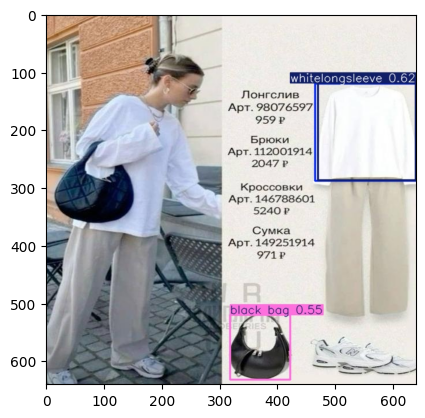

In [ ]:
img1= cv2.cvtColor(cv2.imread('/content/Clothing-Consultant-Bot-1/test/images/image21_jpg.rf.a75b32a4bba2f01a033029967ffe2a17.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [ ]:
import torch
torch.save(model.state_dict(), 'train_model.pth')

In [ ]:
model = YOLO('/content/train_model.pt', task='detect')

KeyError: 'model'

In [ ]:
pred = model.predict(source='/content/Clothing-Consultant-Bot-1/test/images', save=True)

AssertionError: /content/train_model.pth acceptable suffix is ('.pt',), not .pth